In [277]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import io
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from IPython.display import Image
import requests
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score, classification_report,f1_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, learning_curve, validation_curve
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from collections import Counter

In [278]:
import os
print(os.getcwd())

C:\Users\minig\PycharmProjects\pythonProject1\DS4A


In [279]:
data =pd.read_csv('NASP_Public.csv', encoding = "ISO-8859-1")

In [280]:
data

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal,notes,versiondate
0,AL,1988,Illegal,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,20100,60745,100.5,64.3,21.3,330.9,14160,95000,Abortion estimate based on the number of abort...,1 Mar 2021
1,AL,1992,Illegal,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,17720,62260,97.8,64.6,18.4,284.6,14220,94200,NaN,1 Mar 2021
2,AL,1996,Illegal,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,14940,60488,90.9,61.8,15.3,247.0,13590,89020,NaN,1 Mar 2021
3,AL,2000,Illegal,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,13060,63299,93.1,65.2,13.5,206.3,13970,90320,NaN,1 Mar 2021
4,AL,2005,Illegal,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,10840,60453,88.8,63.6,11.4,179.3,13170,84470,NaN,1 Mar 2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,2013,legal,4.0,18.7,75.6,41.9,42.2,140.0,167.5,...,820,7644,91.5,69.4,7.5,107.5,1610,10080,Abortion estimate based on the number of abort...,1 Mar 2021
908,WY,2014,legal,4.0,17.6,82.3,43.2,43.6,138.7,169.2,...,850,7696,92.5,70.0,7.7,110.5,1620,10170,Abortion estimate based on the number of abort...,1 Mar 2021
909,WY,2015,legal,4.0,14.4,79.7,40.1,40.6,140.3,164.1,...,810,7765,92.7,70.5,7.3,104.1,1630,10210,Abortion estimate based on the number of abort...,1 Mar 2021
910,WY,2016,legal,4.0,13.7,72.1,36.7,37.3,125.6,159.2,...,770,7386,88.7,67.5,7.0,103.7,1550,9710,Abortion estimate based on the number of abort...,1 Mar 2021


In [281]:
extracted_col_1 = data.iloc[:,1]
extracted_col_2 = data.iloc[:,2]
extracted_col_3 = data.iloc[:,102]
extracted_col_4 = data.iloc[:,103]

In [282]:
data_is_null = pd.DataFrame(index=['0'], columns = data.columns)

for i in range(data.shape[1]):
    data_is_null.iat[0,i] = data.iloc[:,i].isnull().sum()

data_is_null = data_is_null.loc[:, (data_is_null != 0).any(axis=0)]
data_is_null

,Legal or Illegal,notes
0,45,733


In [283]:
total_state_number = len(Counter(data['state']).keys())
num_data = data
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[1], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)
num_data.drop(num_data.columns[100], axis=1, inplace=True)

In [284]:
num_data = num_data.groupby('state').apply(lambda group: group.interpolate(method='linear', limit_direction='both'))

In [285]:
num_data.fillna(0, inplace=True)

In [286]:
num_data

,state,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,pregnancyrate3034,pregnancyrate3539,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,AL,21.3,78.3,155.7,110.5,114.3,186.5,152.5,87.2,31.9,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,AL,23.6,76.3,173.4,116.4,120.9,184.2,155.0,87.2,32.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,AL,18.5,66.2,156.2,102.4,106.0,176.6,143.2,90.5,34.6,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,AL,11.9,53.7,140.8,89.8,92.1,186.8,158.7,96.1,37.6,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,AL,8.7,38.6,118.7,70.8,72.5,165.8,154.8,100.5,40.7,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,4.0,18.7,75.6,41.9,42.2,140.0,167.5,113.5,49.1,...,16261,110156,820,7644,91.5,69.4,7.5,107.5,1610,10080
908,WY,4.0,17.6,82.3,43.2,43.6,138.7,169.2,116.3,51.5,...,16099,109953,850,7696,92.5,70.0,7.7,110.5,1620,10170
909,WY,4.0,14.4,79.7,40.1,40.6,140.3,164.1,121.3,54.6,...,15984,110164,810,7765,92.7,70.5,7.3,104.1,1630,10210
910,WY,4.0,13.7,72.1,36.7,37.3,125.6,159.2,123.6,53.0,...,15839,109474,770,7386,88.7,67.5,7.0,103.7,1550,9710


In [287]:
# Check if the interpolated data still has any missing values
num_data_is_null = pd.DataFrame(index=['0'], columns = num_data.columns)

for i in range(num_data.shape[1]):
    num_data_is_null.iat[0,i] = num_data.iloc[:,i].isnull().sum()

num_data_is_null = num_data_is_null.loc[:, (num_data_is_null != 0).any(axis=0)]
num_data_is_null

""
0


In [291]:
num_data.insert(1, "year", extracted_col_1)

In [292]:
num_data.insert(2, "Legal or Illegal", extracted_col_2)

In [293]:
num_data

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,AL,1988,Illegal,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,AL,1992,Illegal,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,AL,1996,Illegal,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,AL,2000,Illegal,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,AL,2005,Illegal,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,WY,2013,legal,4.0,18.7,75.6,41.9,42.2,140.0,167.5,...,16261,110156,820,7644,91.5,69.4,7.5,107.5,1610,10080
908,WY,2014,legal,4.0,17.6,82.3,43.2,43.6,138.7,169.2,...,16099,109953,850,7696,92.5,70.0,7.7,110.5,1620,10170
909,WY,2015,legal,4.0,14.4,79.7,40.1,40.6,140.3,164.1,...,15984,110164,810,7765,92.7,70.5,7.3,104.1,1630,10210
910,WY,2016,legal,4.0,13.7,72.1,36.7,37.3,125.6,159.2,...,15839,109474,770,7386,88.7,67.5,7.0,103.7,1550,9710


In [294]:
# Cleaning data
df = num_data
df = df.loc[df['state'] != 'US']
df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)illegal', '0', regex=True)
df['Legal or Illegal'] = df['Legal or Illegal'].replace('(?i)legal', '1', regex=True)

In [295]:
# new_data_2017 = new_data.loc[new_data['year'] == 2017]

In [296]:
dict_State = {'AL' : 1, 'AK' : 2, 'AZ' : 3,'AR' : 4, 'CA' : 5, 'CO' : 6,'CT' :7, 'DE' : 8, 'DC' : 9, 'FL' : 10,
              'GA' : 11, 'HI' : 12, 'ID' : 13, 'IL' : 14, 'IN' : 15, 'IA' : 16, 'KS' : 17, 'KY' : 18, 'LA' : 19,
              'ME' : 20, 'MD' : 21, 'MA' : 22, 'MI' : 23, 'MN' : 24, 'MS' : 25, 'MO' : 26, 'MT' : 27, 'NE' : 28, 
              'NV' : 29, 'NH' : 30, 'NJ' : 31, 'NM' : 32, 'NY' : 33, 'NC' : 34, 'ND' : 35, 'OH' : 36, 'OK' : 37,
              'OR' : 38, 'PA' : 39, 'RI' : 40, 'SC' : 41, 'SD' : 42, 'TN' : 43, 'TX' : 44, 'UT' : 45, 'VT' : 46,
              'VA' : 47, 'WA' : 48, 'WV' : 49, 'WI' : 50, 'WY' : 51}

In [297]:
df["state"]=df["state"].replace(dict_State)

In [298]:
df.head()

,state,year,Legal or Illegal,pregnancyratelt15,pregnancyrate1517,pregnancyrate1819,pregnancyrate1519,pregnancyratelt20,pregnancyrate2024,pregnancyrate2529,...,population40plus,population1544,abortionstotal,birthstotal,pregnancyratetotal,birthratetotal,abortionratetotal,abortionratiototal,miscarriagestotal,pregnanciestotal
0,1,1988,0,21.3,78.3,155.7,110.5,114.3,186.5,152.5,...,132391,945017,20100,60745,100.5,64.3,21.3,330.9,14160,95000
1,1,1992,0,23.6,76.3,173.4,116.4,120.9,184.2,155.0,...,152130,963462,17720,62260,97.8,64.6,18.4,284.6,14220,94200
2,1,1996,0,18.5,66.2,156.2,102.4,106.0,176.6,143.2,...,167319,979413,14940,60488,90.9,61.8,15.3,247.0,13590,89020
3,1,2000,0,11.9,53.7,140.8,89.8,92.1,186.8,158.7,...,177209,970239,13060,63299,93.1,65.2,13.5,206.3,13970,90320
4,1,2005,0,8.7,38.6,118.7,70.8,72.5,165.8,154.8,...,173653,950989,10840,60453,88.8,63.6,11.4,179.3,13170,84470


In [306]:
X = df.drop('Legal or Illegal',axis=1)
y = df['Legal or Illegal']

In [307]:
data = X.to_numpy()
target = y.to_numpy()

In [308]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [309]:
print(train_input.shape, test_input.shape)

(693, 101) (174, 101)


In [313]:
#1. Logistic Regression

In [310]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [311]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8643578643578643
0.8850574712643678


In [312]:
print(lr.coef_, lr.intercept_)

[[ 8.31941817e-01  5.66080086e-01 -6.64409882e-01  1.66227056e-01
   4.61719495e-02 -4.71046341e-01 -5.25919565e-01  5.28705260e-01
   4.43253221e-01 -8.40133450e-01 -5.35159479e-05  9.32912989e-01
  -5.27045826e-01 -6.36410647e-01  1.38007104e+00  1.83551400e-01
   1.93872291e-01  2.00128944e+00  3.96046436e-01 -1.56252311e-01
  -5.14008986e-01  3.10216187e-01  1.38176529e+00  9.59016901e-01
  -5.43675530e-01 -4.08908886e-01 -4.94289794e-01 -4.26093030e-01
   1.63497609e-01 -9.24707725e-01  1.21256134e-01  8.35028219e-01
   9.98200272e-01  7.92660717e-01 -4.81059618e-01 -1.69289810e-01
  -6.14283624e-02 -9.45893639e-01 -1.01786671e+00 -2.22895202e-01
  -8.54866999e-01 -6.83195286e-02 -1.22281529e+00  3.45996119e-01
   1.20762232e-01  2.02289064e-01  1.69958166e-01  1.03089333e-01
   3.73727050e-01  4.84182897e-01 -2.47772606e-01 -2.23567359e-01
  -5.48205846e-01 -3.07039411e-01  5.39793214e-01  1.92062270e-01
   1.73478166e-01  3.71535098e-01 -4.04188219e-01 -2.45895542e-01
  -4.48388

In [315]:
# 2. Decision Tree

In [316]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_input, train_target)
print("no-prune training score: ", dt.score(train_input, train_target))
print("no-prune testing score: ",dt.score(test_input, test_target))

no-prune training score:  1.0
no-prune testing score:  0.9770114942528736


In [317]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_input, train_target)
print("prune training score: ", dt.score(train_input, train_target))
print("prune testing score: ",dt.score(test_input, test_target))

prune training score:  0.987012987012987
prune testing score:  0.9712643678160919


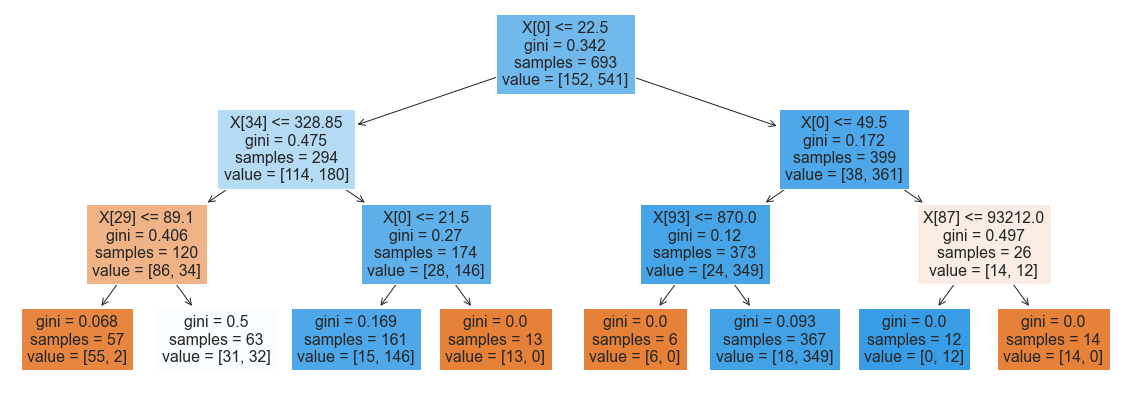

In [319]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
plt.figure(figsize=(20,7))
plot_tree(dt, filled=True)
plt.show()

In [320]:
print(dt.feature_importances_)

[0.42466772 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.09522199
 0.         0.         0.         0.         0.3121736  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.09195905 0.         0.
 0.         0.         0.         0.07597763 0.         0.
 0.         0.         0.         0.         0. 

In [321]:
# Normalize all features
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,stratify=target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, random_state=42)

In [322]:
X_mean = X_train.mean()
X_std = X_train.std()

normalize = lambda raw: (raw - X_mean) / X_std
denormalize = lambda raw: raw * X_std + X_mean
X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [323]:
# k folf (5) cross validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.8614638723803566


In [324]:
# 10 fold cross validation
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8730227743271222


In [325]:
from sklearn.metrics import log_loss, auc, roc_auc_score
from sklearn import tree
depth = 40
tree_auc_trn, tree_auc_tst = np.zeros(depth), np.zeros(depth)
for i in range(1,depth):
    clf1 = tree.DecisionTreeClassifier(max_depth=i, criterion='gini')
    clf1 = clf1.fit(X_train, y_train)
    tree_auc_trn[i] = roc_auc_score(y_train, clf1.predict_proba(X_train)[:,1])
    tree_auc_tst[i] = roc_auc_score(y_test, clf1.predict_proba(X_test)[:,1])

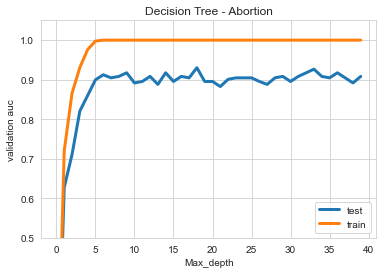

<Figure size 864x864 with 0 Axes>

In [355]:
plt.plot(tree_auc_tst, linewidth=3, label = "test")
plt.plot(tree_auc_trn, linewidth=3, label = "train")
plt.legend()
plt.ylim(0.5, 1.05)
plt.xlabel("Max_depth")
plt.title('Decision Tree - Abortion')
plt.ylabel("validation auc")
plt.figure(figsize=(12,12))
plt.show()

In [347]:
# 3. KNN

In [342]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=42)

In [343]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [344]:
knn.score(X_train, y_train)

0.9314079422382672

In [345]:
knn.score(X_val, y_val)

0.9064748201438849

In [346]:
best_val = 0
best_n = 0
best_weights = ""
best_metric = ""
for n in range(1,20):
    for weights in ["uniform", "distance"]:
        for metric in ["euclidean", "manhattan", "minkowski"]:
            knn = KNeighborsClassifier(n_neighbors=n, weights=weights, metric=metric)
            knn.fit(X_train,y_train)
            val_score = knn.score(X_val, y_val)
            if val_score > best_val:
                best_val = val_score
                best_n = n
                best_weights = weights
                best_metric = metric
print("Best validation score: ", best_val)
print("Best n: ", best_n)
print("Best weights method: ", best_weights)
print("Best distance metric: ", best_metric)

Best validation score:  0.9856115107913669
Best n:  1
Best weights method:  uniform
Best distance metric:  manhattan


In [348]:
best_n = 1
best_weights = "uniform"
best_metric = "manhattan"
knn = KNeighborsClassifier(n_neighbors=best_n, weights=best_weights, metric=best_metric)
knn.fit(X_train,y_train)
print("Training score: ", knn.score(X_train, y_train))
print("Test score: ", knn.score(X_test, y_test))

Training score:  1.0
Test score:  0.9712643678160919


In [349]:
error_rate = []
for n in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=n, weights="uniform", metric="euclidean")
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_val)
    error_rate.append(np.mean(pred_i != y_val))

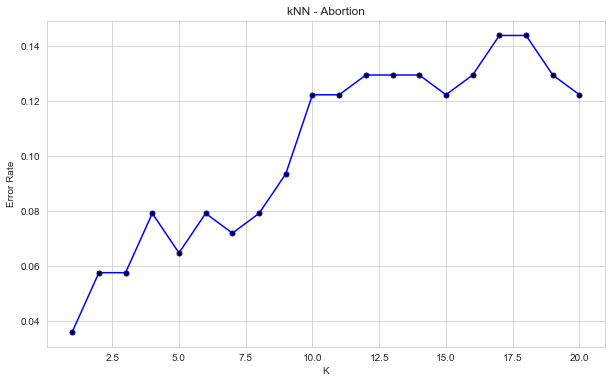

In [351]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('kNN - Abortion')
plt.show()

In [352]:
kn = range(1,21,5)
kauc_trn, kauc_tst = np.zeros(len(kn)), np.zeros(len(kn))
for i, k in zip(range(0, len(kn)), kn):
    clf1 = KNeighborsClassifier(n_neighbors=k, algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, p=2, weights='uniform')
    clf1 = clf1.fit(X_train, y_train)
    pred_tst = clf1.predict_proba(X_test)[:,1]
    pred_trn = clf1.predict_proba(X_train)[:,1]
    kauc_tst[i] = roc_auc_score(y_test, pred_tst)
    kauc_trn[i] = roc_auc_score(y_train, pred_trn)

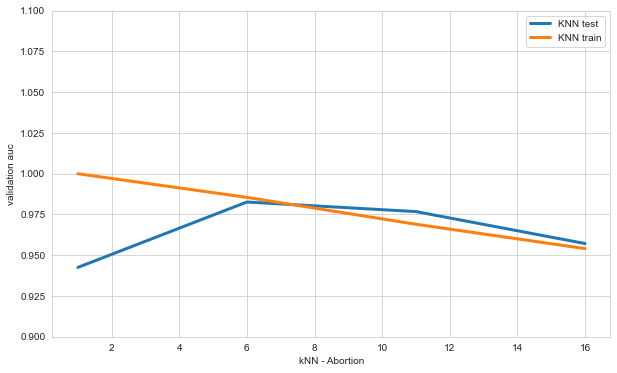

In [354]:
plt.figure(figsize=(10,6))
plt.plot(kn, kauc_tst, linewidth=3, label = "KNN test")
plt.plot(kn, kauc_trn, linewidth=3, label = "KNN train")
#pyplot.grid()
plt.legend()
plt.ylim(0.9, 1.1)
plt.xlabel("kNN - Abortion")
plt.ylabel("validation auc")
plt.show()